# 03. Creating the Target Variable (`SLAFail`)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
from pandas_profiling import ProfileReport
from pathlib import Path


In [2]:
df = pd.read_csv("data/02.a.Detail_Incident.csv", parse_dates=['Open_Time', 'Resolved_Time','Close_Time'])

In [3]:
df.dtypes

CI_Name_aff                           object
CI_Type_aff                           object
CI_Subtype_aff                        object
Service_Component_WBS_aff             object
Incident_ID                           object
Impact                                 int64
Urgency                                int64
Priority                               int64
KM_number                             object
Count_Reassignments                  float64
Open_Time                     datetime64[ns]
Resolved_Time                 datetime64[ns]
Close_Time                    datetime64[ns]
Handle_Time_Hours                    float64
Closure_Code                          object
Count_Related_Interactions           float64
Related_Interaction                   object
Count_Related_Incidents              float64
Count_Related_Changes                float64
Related_Change                        object
CI_Name_CBy                           object
CI_Type_CBy                           object
CI_Subtype

In [4]:
df.head()

,CI_Name_aff,CI_Type_aff,CI_Subtype_aff,Service_Component_WBS_aff,Incident_ID,Impact,Urgency,Priority,KM_number,Count_Reassignments,...,Count_Related_Interactions,Related_Interaction,Count_Related_Incidents,Count_Related_Changes,Related_Change,CI_Name_CBy,CI_Type_CBy,CI_Subtype_CBy,ServiceComp_WBS_CBy,ReopenedFlag
0,APP000005,application,Citrix,WBS000292,IM0001224,4,4,4,KM0001060,0.0,...,1.0,SD0001630,0.0,0.0,Not Applicable,APP000005,application,Citrix,WBS000292,0
1,DSK000457,computer,Desktop,WBS000187,IM0001226,5,5,5,KM0001446,2.0,...,1.0,SD0001635,0.0,0.0,Not Applicable,DSK000457,computer,Desktop,WBS000187,0
2,SBA000263,application,Server Based Application,WBS000072,IM0001229,5,5,5,KM0000644,12.0,...,1.0,SD0001644,0.0,0.0,Not Applicable,#N/B,#N/B,#N/B,#N/B,0
3,SBA000154,application,Server Based Application,WBS000027,IM0001230,5,5,5,KM0001291,1.0,...,1.0,SD0001640,0.0,0.0,Not Applicable,SBA000154,application,Server Based Application,WBS000027,0
4,LAP000019,computer,Laptop,WBS000091,IM0001231,5,5,5,KM0000315,0.0,...,1.0,SD0001638,0.0,0.0,Not Applicable,KYB000001,hardware,Keyboard,WBS000091,0


In [5]:
df['TimeToResolve'] = df.Resolved_Time - df.Open_Time

In [6]:
df.TimeToResolve.describe()

count                      35208
mean      3 days 16:21:45.273148
std      10 days 08:24:08.475153
min              0 days 00:00:17
25%       0 days 01:12:33.250000
50%       0 days 16:20:28.500000
75%       3 days 02:57:33.500000
max            175 days 06:40:30
Name: TimeToResolve, dtype: object

In [7]:
df.TimeToResolve.mode()

0   00:08:22
dtype: timedelta64[ns]

In [8]:
df.head()

,CI_Name_aff,CI_Type_aff,CI_Subtype_aff,Service_Component_WBS_aff,Incident_ID,Impact,Urgency,Priority,KM_number,Count_Reassignments,...,Related_Interaction,Count_Related_Incidents,Count_Related_Changes,Related_Change,CI_Name_CBy,CI_Type_CBy,CI_Subtype_CBy,ServiceComp_WBS_CBy,ReopenedFlag,TimeToResolve
0,APP000005,application,Citrix,WBS000292,IM0001224,4,4,4,KM0001060,0.0,...,SD0001630,0.0,0.0,Not Applicable,APP000005,application,Citrix,WBS000292,0,0 days 01:02:48
1,DSK000457,computer,Desktop,WBS000187,IM0001226,5,5,5,KM0001446,2.0,...,SD0001635,0.0,0.0,Not Applicable,DSK000457,computer,Desktop,WBS000187,0,6 days 03:33:15
2,SBA000263,application,Server Based Application,WBS000072,IM0001229,5,5,5,KM0000644,12.0,...,SD0001644,0.0,0.0,Not Applicable,#N/B,#N/B,#N/B,#N/B,0,6 days 08:18:59
3,SBA000154,application,Server Based Application,WBS000027,IM0001230,5,5,5,KM0001291,1.0,...,SD0001640,0.0,0.0,Not Applicable,SBA000154,application,Server Based Application,WBS000027,0,0 days 07:00:10
4,LAP000019,computer,Laptop,WBS000091,IM0001231,5,5,5,KM0000315,0.0,...,SD0001638,0.0,0.0,Not Applicable,KYB000001,hardware,Keyboard,WBS000091,0,1 days 02:50:13


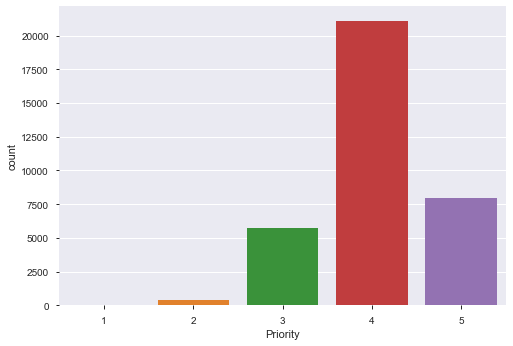

In [9]:
sns.countplot(x='Priority', data=df)

In [10]:
df['TimeToResolve_Minutes'] = df.TimeToResolve.dt.total_seconds() / 60

In [11]:
df.head()

,CI_Name_aff,CI_Type_aff,CI_Subtype_aff,Service_Component_WBS_aff,Incident_ID,Impact,Urgency,Priority,KM_number,Count_Reassignments,...,Count_Related_Incidents,Count_Related_Changes,Related_Change,CI_Name_CBy,CI_Type_CBy,CI_Subtype_CBy,ServiceComp_WBS_CBy,ReopenedFlag,TimeToResolve,TimeToResolve_Minutes
0,APP000005,application,Citrix,WBS000292,IM0001224,4,4,4,KM0001060,0.0,...,0.0,0.0,Not Applicable,APP000005,application,Citrix,WBS000292,0,0 days 01:02:48,62.800000
1,DSK000457,computer,Desktop,WBS000187,IM0001226,5,5,5,KM0001446,2.0,...,0.0,0.0,Not Applicable,DSK000457,computer,Desktop,WBS000187,0,6 days 03:33:15,8853.250000
2,SBA000263,application,Server Based Application,WBS000072,IM0001229,5,5,5,KM0000644,12.0,...,0.0,0.0,Not Applicable,#N/B,#N/B,#N/B,#N/B,0,6 days 08:18:59,9138.983333
3,SBA000154,application,Server Based Application,WBS000027,IM0001230,5,5,5,KM0001291,1.0,...,0.0,0.0,Not Applicable,SBA000154,application,Server Based Application,WBS000027,0,0 days 07:00:10,420.166667
4,LAP000019,computer,Laptop,WBS000091,IM0001231,5,5,5,KM0000315,0.0,...,0.0,0.0,Not Applicable,KYB000001,hardware,Keyboard,WBS000091,0,1 days 02:50:13,1610.216667


## SLA Business Rule

| Priority | SLA in Minutes | SLA in Hours | SLA in Days|
| ---------------| ---- |---- |---- |
| 1 Very High | 240  | 4 | 0.16 |
| 2 High   |  480  | 8  | 0.3
| 3 Medium | 1440  | 24  |  1  |
| 4 Low |   2880   | 48  |  2  |
| 5 Very Low | 5760  | 96  |  4  |


SLAFail = ( Priority == 1 & TimeToResolve_Minutes > 240 ) | ( Priority == 2 & TimeToResolve_Minutes > 480 ) | ( Priority == 3 & TimeToResolve_Minutes > 1440 ) | ( Priority == 4 & TimeToResolve_Minutes > 2880 ) | ( Priority == 5 & TimeToResolve_Minutes > 5760 ) 


In [12]:
df['SLAFail'] = ( (df['Priority'] == 1) & (df['TimeToResolve_Minutes'] > 240) ) | ( (df['Priority'] == 2) & (df['TimeToResolve_Minutes'] > 480) ) | ( (df['Priority'] == 3) & (df['TimeToResolve_Minutes'] > 1440) ) | ( (df['Priority'] == 4) & (df['TimeToResolve_Minutes'] > 2880) ) | ( (df['Priority'] == 5) & (df['TimeToResolve_Minutes'] > 5760) ) 

In [13]:
df.SLAFail = df.SLAFail.astype(int)

In [14]:
df.SLAFail.value_counts(normalize=True)

0    0.701261
1    0.298739
Name: SLAFail, dtype: float64

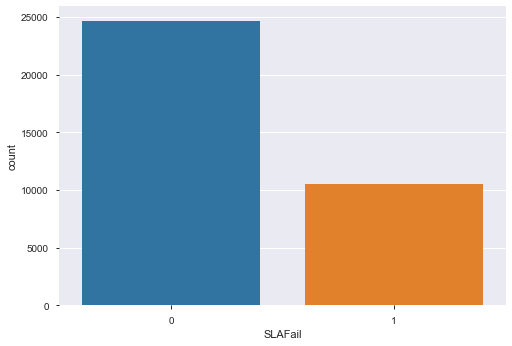

In [15]:
sns.countplot(x='SLAFail', data=df)

In [16]:
# 
df = df.drop(['TimeToResolve'], axis='columns')

## END and OUTPUT

In [17]:
with open("data/03.a.Detail_Incident.csv",'w') as f:
    df.to_csv(f, index=False)

In [18]:
df.reset_index(drop=True, inplace=True)
profile = ProfileReport(df, title="Profile of BPIC 2014 Detail_Incident Data after Adding SLAFail", html={'style': {'full_width': True}})

In [19]:
profile.to_file(Path(str("reports/03.b.Detail_Incident_Profile.html")))